# Project Module 2: Derivative

Numerical Method CPSMA 441
Prof: Nicholas Jacobs

Member(s):
Hoang Tan Truong
Aakriti Khadka

The following are fuctions that were priviously defined and used on Module 1.

In [85]:
import math
pi = math.pi
sqrt2 = math.sqrt(2)


def abs_err(estimated_value, actual_value):
    return actual_value - estimated_value

def rel_err(estimated_value, actual_value):
    return abs_err(estimated_value, actual_value)/actual_value

def apprx_err(prev_est, curr_est):
    return curr_est - prev_est

def rel_apprx_err(prev_est, curr_est):
    return apprx_err(prev_est, curr_est)/curr_est

def general_Taylor_coef(degree):
    return (-1)**(math.floor(degree/2))/sqrt2*math.factorial(degree)

def taylor_Poly_term(degree, input):
    return general_Taylor_coef(degree)*(input-pi/4)**degree

def Taylor_Poly(degree, input):
    sum = 0;
    for i in range(0, degree+1):
        sum += taylor_Poly_term(i, input)
    return sum

# Question 1: Estimate Derivative

(a) Write a function for computing the forward difference, backward difference, central difference for
the derivative.

(b) Write a function for computing the finite difference of the second order derivative.

The funtion that we used on last module is f(x) = ln(x+1)

In [86]:
def fwrd_diff(func, first, step):
    return (func(first + step) - func(first))/step

def bwrd_diff(func, first, step):
    return (func(first) - func(first-step))/step

def centr_diff(func, first, step):
    return (func(first + step) - func(first - step) )/(step*2)

def finite_diff(func, first, step):
    return (func(first + 2*step) - 2*func(first + step) + func(first))/step**2

Now we are off to compute, with the multiplication of .1 that starts from 1 to .0001
The function that we are going to use is f(x)=cos(x)

In [87]:
def function(x):
    return math.log(x+1)
value = 2

#step_range = [1*(0.1**n) for n in range(5)]
step_range = [1, 0.1, 0.01, 0.001, 0.0001]

fwrd = [fwrd_diff(function, value, step) for step in step_range]
bwrd = [bwrd_diff(function, value, step) for step in step_range]
centr = [centr_diff(function, value, step) for step in step_range]
finite = [finite_diff(function, value, step) for step in step_range]

actual = math.log(3)

abs_fwrd = [abs_err(est, actual) for est in fwrd]
rel_fwrd = [rel_err(est, actual) for est in fwrd]

abs_bwrd = [abs_err(est, actual) for est in bwrd]
rel_bwrd = [rel_err(est, actual) for est in bwrd]

abs_centr = [abs_err(est, actual) for est in centr]
rel_centr = [rel_err(est, actual) for est in centr]

actual_2nd = -math.log(3)

abs_finite = [abs_err(est, actual_2nd) for est in finite]
rel_finite = [rel_err(est, actual_2nd) for est in finite]


The following is the table containing outputs from those funtions:

In [88]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}]]
)

fig.add_trace(go.Table(
            header = dict(values = ['Step', 'Foward Estimate', 'Absolute Error', 'Relative Error']),
            cells = dict(values = [step_range, fwrd, abs_fwrd, rel_fwrd])),
             row = 1,
             col = 1)

fig.add_trace(go.Table(
            header = dict(values = ['Step', 'Backward Estimate', 'Absolute Error', 'Relative Error']),
            cells = dict(values = [step_range, bwrd, abs_bwrd, rel_bwrd])),
             row = 2,
             col = 1)

fig.add_trace(go.Table(
            header = dict(values = ['Step', 'Central Estimate', 'Absolute Error', 'Relative Error']),
            cells = dict(values = [step_range, centr, abs_centr, rel_centr])),
             row = 3,
             col = 1)

fig.add_trace(go.Table(
            header = dict(values = ['Step', 'Finite Estimate', 'Absolute Error', 'Relative Error']),
            cells = dict(values = [step_range, finite, abs_finite, rel_finite])),
             row = 4,
             col = 1)

fig.show()



# Question 2: Lagrange interpolation

I have decided to break the code into two functions like Prof. Jacobs suggested. I do think it looks more readable and neat. 

In [89]:
inpValue = [2, 2.1, 4]
outpValue = [function(x) for x in inpValue]

In [90]:
def lagrangeCoef(inp, outp, entry, var):
    coef = 1
    for i in range(len(inp)):
        if i == entry:
            continue
        else:
            coef = coef*(var - inp[i])/(inp[entry] - inp[i])
    return coef

def lagrangeInterpolator(inp, outp, var):
    interp = 0
    for i in range(len(inp)):
        interp = interp + lagrangeCoef(inp, outp, i, var)*outp[i]
    return interp

The following is the graph of the result calculated from the above funcrion. The graph of the function ln(x+1) will be included as well.

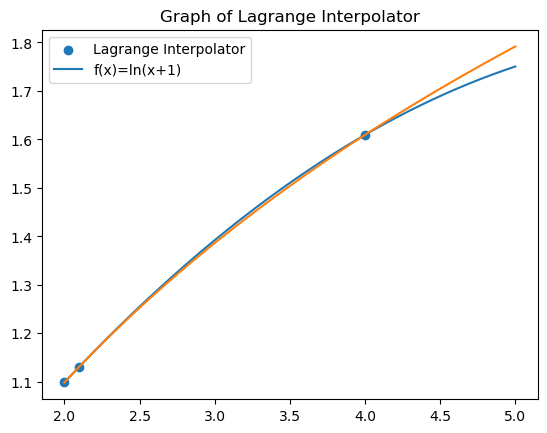

In [91]:
import matplotlib.pyplot as pl
import numpy as numpie

x = numpie.arange(2, 5, 0.001)

pl.scatter(inpValue, outpValue)
pl.plot(x, lagrangeInterpolator(inpValue, outpValue, x))
pl.plot(x, numpie.log(x+1))
pl.title('Graph of Lagrange Interpolator')
pl.legend(['Lagrange Interpolator', 'f(x)=ln(x+1)'])

pl.show()

Compute the absolute and relative error for the interpolation at center + 0.2.

In [92]:
func_err = [abs_err(lagrangeInterpolator(inpValue, outpValue, 2 + 0.2), function(2 + 0.2)),
            rel_err(lagrangeInterpolator(inpValue, outpValue, 2 +0.2), function(2 + 0.2))]

In [93]:
func_err

[-0.00027812012581129864, -0.0002391092569137807]

Compute the absolute and relative error for the second derivative of the interpolation at center +
0.2.

In [94]:
secondDerivativeLI = 2*outpValue[0]/((inpValue[0] - inpValue[1])*(inpValue[0] - inpValue[2]))  + 2*outpValue[1]/((inpValue[1] - inpValue[0])*(inpValue[1] - inpValue[2])) + 2*outpValue[2]/((inpValue[2] - inpValue[0])*(inpValue[2] - inpValue[1]))

In [95]:
secondDerivativeLI

-0.0763004382599074

In [96]:
secondDerivativeLI_err = [abs_err(secondDerivativeLI, -1/(2.2 + 1)**2),
                         rel_err(secondDerivativeLI, -1/(2.2 + 1)**2)]

In [97]:
secondDerivativeLI_err

[-0.021355811740092587, 0.21868351221854812]

# Review

(a)
Even though for this picked functions, all foward, backward, and central differernce are relatively as accurate as each others, but I can see from the computation that Central Difference would yield to a more precise result.

Lagrange Interpolator is really great to guess the overall form and shape of the function, especially for Polynomial. However, it is not great to approximating second derivative appearently. I suspect that 0.02 is perhaps a not great great value to yield to a better result and also ln(x+1) is not polynomial.

(b)
Since backward, forward, and central difference are to approximating the derivative, and approximation are not preciuse result, short comings commparing to actual value is guranteed. These kind of appriximation uses two points on the function and the difference between those two points in value (in term of x axes) to approximate the derivative.

(c)
The following is the generalized formula of Lagrange Interpolation for n-th degree
$L_{i}(x)=\frac{(x-x_{2})(x-x_{3})...(x-x_{i})(x-x_{i+1})}{(x_{1}-x_{2})(x_{1}-x_{3})...(x_{1}-x_{i})(x_{1}-x_{i+1})}L_{1}(x_{1}) + \frac{(x-x_{1})(x-x_{3})...(x-x_{i})(x-x_{i+1})}{(x_{2}-x_{1})(x_{2}-x_{3})...(x_{2}-x_{i})(x_{2}-x_{i+1})}L_{2}(x_{2}) +...+ \frac{(x-x_{1})(x-x_{2})...(x-x_{i-1})(x-x_{i+1})}{(x_{i}-x_{1})(x_{i}-x_{2})...(x_{i}-x_{i-1})(x_{i}-x_{i+1})}L_{i}(x_{i}) + \frac{(x-x_{1})(x-x_{2})...(x-x_{i-1})(x-x_{i})}{(x_{i+1}-x_{1})(x_{i+1}-x_{2})...(x_{i+1}-x_{i-1})(x_{i+1}-x_{i})}L_{i+1}(x_{i+1})$

The shorter notation would be:
$L_{i}(x) = \sum_{i = 1}^{n+1} L(x_{i}) \Pi_{j\neq i}\frac{x-x_{j}}{x_{i}-x{j}}$

(d) Each of the term of the Lagrange Interpolation formula represents each special case that is given (the location of a point). In order to make sure each special case is met (the location of a point to be on the graph), each of the term will have a coefficient. Coefficients are obtained by subtracting each point coordinator to the function, then calculating perpestive coefficient. The idea is that we assume the function is polynomial and according to given point coordination, we calculated the coefficents that are associated with each term.